In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
df.duplicated().sum()

0

In [8]:
x=df.drop(columns=['sex','smoker','region'])

In [9]:
x

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [10]:
y=df['expenses']

In [11]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
(x_train.shape,y_train.shape) , (x_test.shape,y_test.shape)

(((1069, 4), (1069,)), ((268, 4), (268,)))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=2)

In [17]:
pca_scaled=pca.fit_transform(x_train)

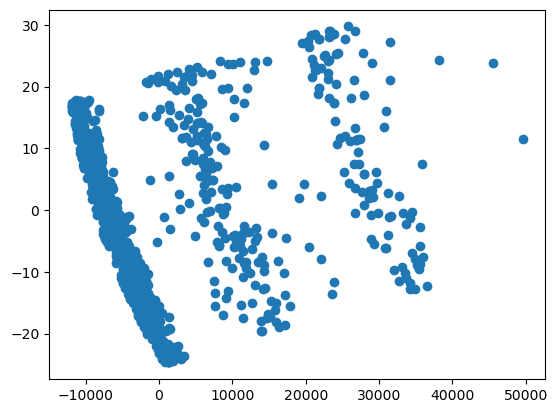

In [18]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

In [21]:
wcss

[146362031091.2897,
 37308963774.588234,
 17563640953.12513,
 8938225902.733845,
 6488107632.399696,
 4583733686.855537,
 3184998890.0464563,
 2607883754.0998154,
 2065434749.0380793,
 1720866461.4872437]

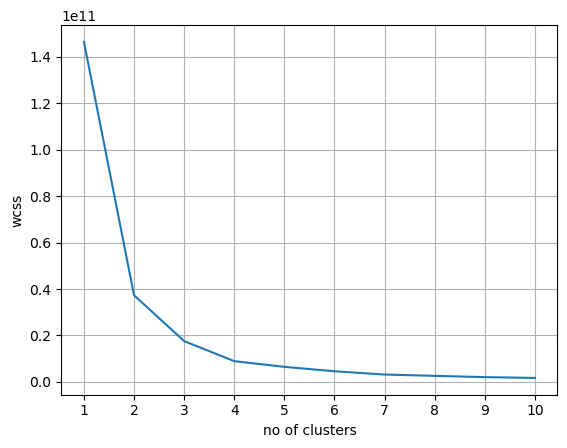

In [22]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

In [23]:
kmeans=KMeans(n_clusters=2,init='k-means++')

In [24]:
y_labels=kmeans.fit_predict(x_train)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
y_labels

array([0, 0, 1, ..., 0, 0, 0])

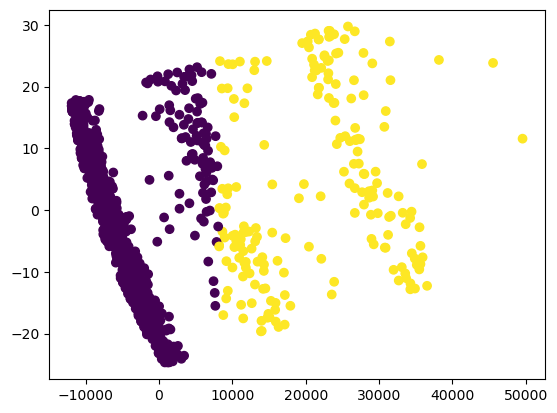

In [26]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y_labels)

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

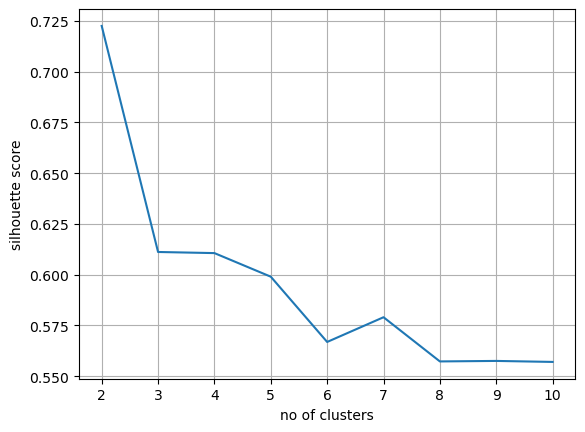

In [29]:
#plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('no of clusters')
plt.ylabel('silhouette score')
plt.grid(True)

In [30]:
#Agglomerative clustering
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'eucledian distance')

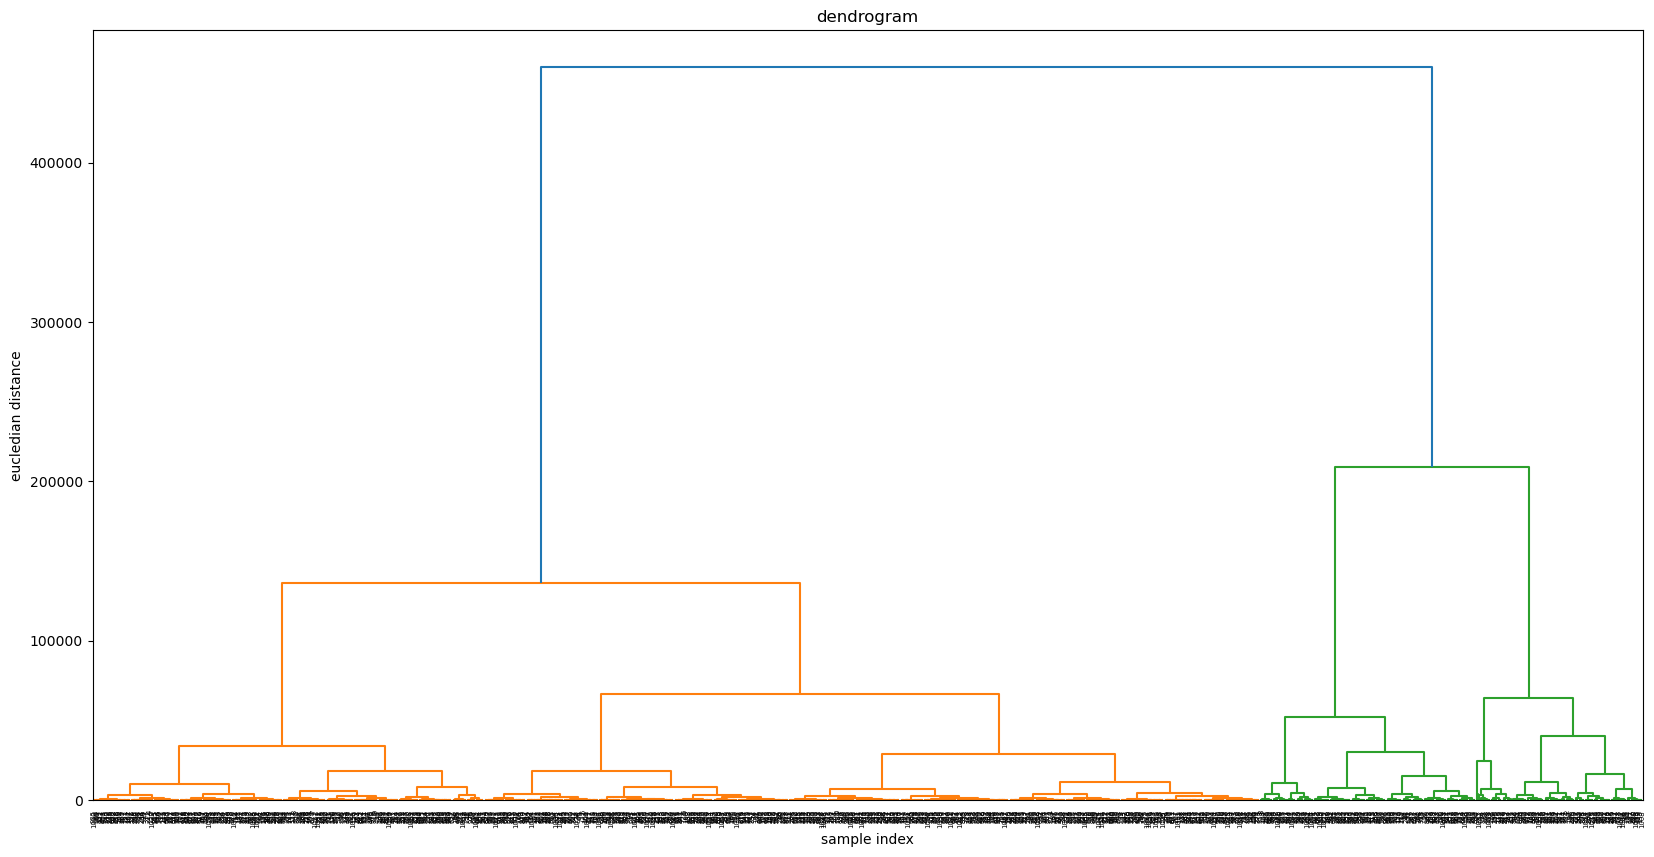

In [31]:
#plot the dendogram
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dendrogram')
plt.xlabel('sample index')
plt.ylabel('eucledian distance')

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [34]:
cluster.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

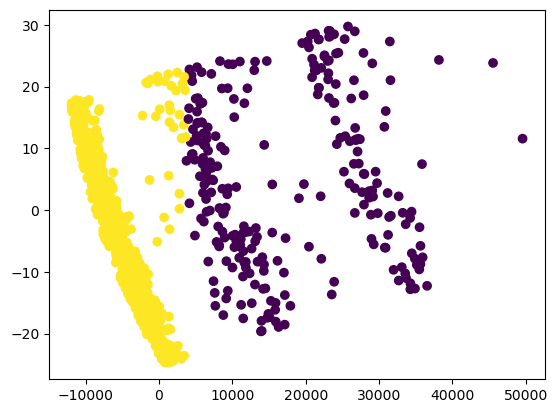

In [35]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(pca_scaled)
    score=silhouette_score(pca_scaled,agglo.labels_)
    silhouette_coefficients.append(score)
    

C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\ab\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4

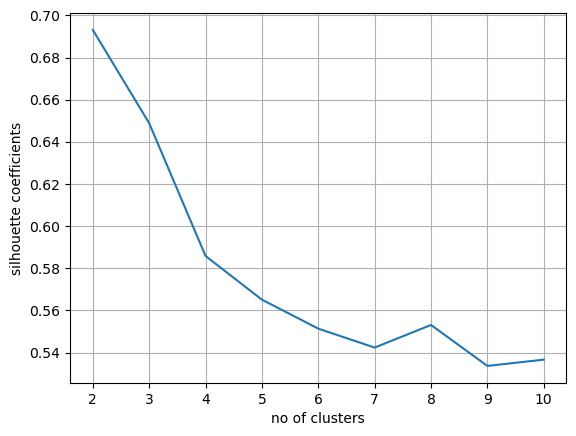

In [38]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('no of clusters')
plt.ylabel('silhouette coefficients')
plt.grid(True)
plt.show()